**Recommended Video:** [Multiple Linear Regression](https://www.youtube.com/watch?v=5tCSR5L4nWI)

# Multiple Linear Regression

# Understanding Multiple Linear Regression

Imagine you’re tasked with predicting house prices in a bustling real estate market. Buyers and sellers alike want accurate insights, but prices depend on multiple factors: square footage, number of bedrooms, and even the age of the house. How do we account for all these variables to make precise predictions?

This is where **multiple linear regression** comes in. Unlike simple linear regression, which analyzes a single factor, multiple linear regression incorporates multiple predictors to explain variations in the dependent variable.

---

## The Model

The general formula for multiple linear regression is:

$$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n + \epsilon
$$

Here’s what the terms mean:

- **Y**: Dependent variable (e.g., house price)
- **X₁, X₂, ..., Xₙ**: Independent variables (e.g., square footage, bedrooms, age of the house)
- **$( \beta_0 )$**: Intercept, or the baseline value of Y when all X variables are zero
- **$( \beta_1, \beta_2, ..., \beta_n )$**: Coefficients representing how much Y changes for a one-unit change in each X variable, holding others constant
- **$( \epsilon )$**: Error term accounting for variations not explained by the model

---

## Key Features

### Multiple Predictors
In contrast to simple regression, multiple linear regression leverages several independent variables to explain the dependent variable. For example, when predicting house prices:

- **X₁**: Square footage
- **X₂**: Number of bedrooms
- **X₃**: Age of the house

### Coefficients
Each variable gets its own coefficient, which quantifies its unique contribution. For instance:

- **$( \beta_1 )$**: Indicates how much the price increases for every additional square foot, holding other factors constant.
- **$( \beta_2 )$**: Shows the price change for each additional bedroom.
- **$( \beta_3 )$**: Reflects how the house price decreases with age.

### Least Squares Estimation
The model estimates coefficients using the **least squares method**, which minimizes the sum of squared residuals (the differences between observed and predicted values).

---

## Assumptions for Accuracy

For reliable results, multiple linear regression relies on key assumptions:

1. **Linearity**: The relationship between independent and dependent variables is linear.
2. **Independence**: Observations are independent of one another.
3. **Homoscedasticity**: The variance of residuals remains constant across all values of the predictors.
4. **Normality**: The residuals follow a normal distribution.

---

## Real-World Application: House Price Prediction

Imagine building a model to predict house prices:

### The Equation
$$
\text{Price} = \beta_0 + \beta_1(\text{Square Footage}) + \beta_2(\text{Bedrooms}) + \beta_3(\text{Age}) + \epsilon
$$

### Interpretation
- **$( \beta_1 )$***: For every additional square foot, the house price increases by **$( \beta_1 )$** dollars, assuming other variables remain constant.
- **$( \beta_2 )$**: Adding a bedroom increases the price by **$( \beta_2 )$** dollars.
- **$( \beta_3 )$**: Each year of age reduces the price by **$( \beta_3 )$** dollars.

This approach provides actionable insights for buyers, sellers, and agents, enabling data-driven decisions.

---

## Beyond Basics

Multiple linear regression isn’t limited to simple predictors. It can accommodate:

- **Interaction Terms**: To capture relationships between predictors.
- **Polynomial Terms**: For curvilinear relationships.
- **Transformations**: To address non-linearity or scale differences.

---

Ready to see this in action? Explore a practical example using the California Housing Dataset in the next section, and bring the concepts to life!



## Example:  Multiple Linear Regression with the California Housing Dataset

As a data scientist working for a real estate firm, we've been tasked with developing a model that can predict housing prices in California based on various factors such as location, number of bedrooms and bathrooms, square footage, and more. Our goal is to create a reliable and accurate model that can help homebuyers and sellers make informed decisions in the competitive California housing market.

We'll be working with the California Housing Dataset, which contains information on housing prices and features from various regions in California. Your task is to implement a Multiple Linear Regression model using this dataset and evaluate its performance. Lets create a model that accurately predicts California housing prices and helps people achieve their California dream

## Importing Libraries
Importing necessary libraries for data manipulation, model implementation, and evaluation metrics.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Housing Dataset
Loading the Califonia Housing dataset, which contains information about housing prices and features.

In [ ]:
import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1bKeWaUP-y6S3Of493W4gt1mZzqI0n0Ud/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)


In [ ]:
# Load the Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

In [ ]:
print("First five rows of the dataset:")
df.head()

First five rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [ ]:
# Display basic information about the dataset
print("\nDataset information:")
print(df.info())



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
# Display summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
           MedInc    HouseAge    AveRooms   AveBedrms  Population    AveOccup  \
count  20640.0000  20640.0000  20640.0000  20640.0000  20640.0000  20640.0000   
mean       3.8707     28.6395      5.4290      1.0967   1425.4767      3.0707   
std        1.8998     12.5856      2.4742      0.4739   1132.4621     10.3860   
min        0.4999      1.0000      0.8462      0.3333      3.0000      0.6923   
25%        2.5634     18.0000      4.4407      1.0061    787.0000      2.4297   
50%        3.5348     29.0000      5.2291      1.0488   1166.0000      2.8181   
75%        4.7432     37.0000      6.0524      1.0995   1725.0000      3.2823   
max       15.0001     52.0000    141.9091     34.0667  35682.0000   1243.3333   

         Latitude   Longitude  MedHouseVal  
count  20640.0000  20640.0000   20640.0000  
mean      35.6319   -119.5697       2.0686  
std        2.1360      2.0035       1.1540  
min       32.5400   -124.3500       0.1500  
25%       33.9300   -121

## Split the data into training and testing sets

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

In [ ]:
# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Multiple Linear Regression model

In [ ]:
# Initializing and training the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making predictions on the test set
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

## Evaluate the model

In [ ]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 0.56
Mean Absolute Error (MAE): 0.53
R-squared (R2): 0.58


## Visualize the model performance

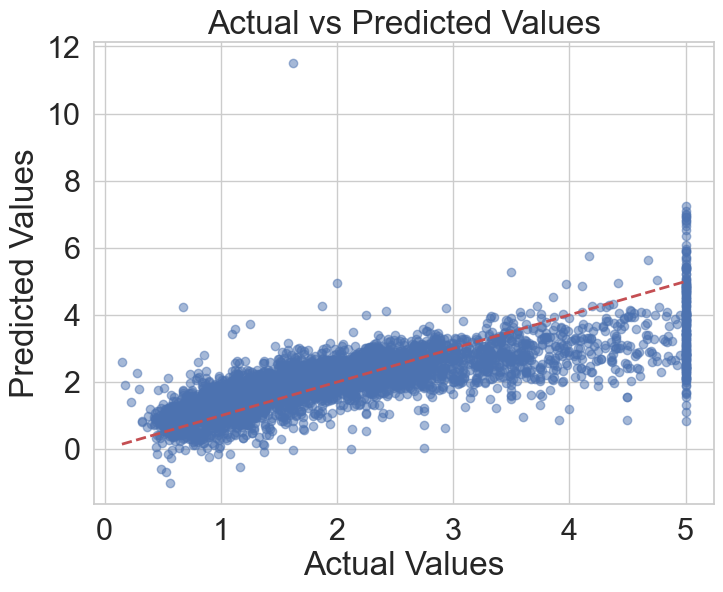

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Introducing Ridge, Lasso, and Elastic Net Regression

## 1. **Ridge Regression** (L2 Regularization)
Imagine you're building a machine learning model, but it starts "overfitting" — meaning it performs great on the training data but poorly on new, unseen data. Ridge regression helps fix this by adding a penalty to the model for having overly large coefficients (the numbers that determine the importance of features).

- It tries to keep the coefficients **small but not exactly zero**.  
- Think of it like trying to control how much influence each feature has, without completely removing any of them.

### Key Point:
Ridge works well when **all features are important but need to be controlled**.

---

## 2. **Lasso Regression** (L1 Regularization)
Lasso regression also adds a penalty, but instead of just shrinking coefficients like Ridge, it can shrink some of them **exactly to zero**. This means it can automatically **remove unimportant features** from the model.

- Imagine you're packing for a trip but have limited space. Lasso helps you decide which items (features) to leave behind to make your suitcase manageable.

### Key Point:
Lasso works well when you suspect that **only a few features are truly important**, and you want to ignore the rest.

---

## 3. **Elastic Net Regression**
Elastic Net is like a combination of Ridge and Lasso. It adds both types of penalties, balancing between:
- Shrinking coefficients like Ridge.
- Selecting important features like Lasso.

- It's useful when there are **many correlated features**, and you want the benefits of both Ridge and Lasso.

### Key Point:
Elastic Net is a good choice when you're unsure whether Ridge or Lasso alone will work best.

---

## Summary Table
| Regression Type | Key Feature | When to Use |
|------------------|-------------|-------------|
| Ridge (L2)       | Shrinks coefficients but keeps them non-zero | When all features matter, but need control |
| Lasso (L1)       | Shrinks coefficients to zero, removing unimportant features | When only a few features are important |
| Elastic Net      | Combines Ridge and Lasso | When features are correlated or you're unsure which regularization to use |



## Adding Lasso, Ridge and ElasticNet Models

In [ ]:
# Initializing the models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)


## Implementing Lasso Regression
Implementing Lasso Regression using the Lasso class from scikit-learn.

In [ ]:
# Implement Lasso Regression
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


# Evaluating Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso Regression:")
print(f"MSE: {mse_lasso:.2f}, R2: {r2_lasso:.2f}")



Lasso Regression:
MSE: 0.61, R2: 0.53


## Implementing Ridge Regression
Implementing Ridge Regression using the Ridge class from scikit-learn.

In [ ]:
# Implement Ridge Regression
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluating Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge Regression:")
print(f"MSE: {mse_ridge:.2f}, R2: {r2_ridge:.2f}")


Ridge Regression:
MSE: 0.56, R2: 0.58


## Implementing Elastic Net Regression
Implementing Elastic Net Regression using the ElasticNet class from scikit-learn.

In [ ]:
# Implement Elastic Net Regression
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)


# Evaluating ElasticNet
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
print("\nElasticNet Regression:")
print(f"MSE: {mse_elastic:.2f}, R2: {r2_elastic:.2f}")


ElasticNet Regression:
MSE: 0.57, R2: 0.56


## Comparing the Performance of Different Models
Comparing the performance of different models using Mean Squared Error (MSE) and R-Squared (R2).


Model Comparison:
               Model     MSE      R2
0              Ridge  0.5558  0.5759
1  Linear Regression  0.5559  0.5758
2         ElasticNet  0.5731  0.5627
3              Lasso  0.6135  0.5318


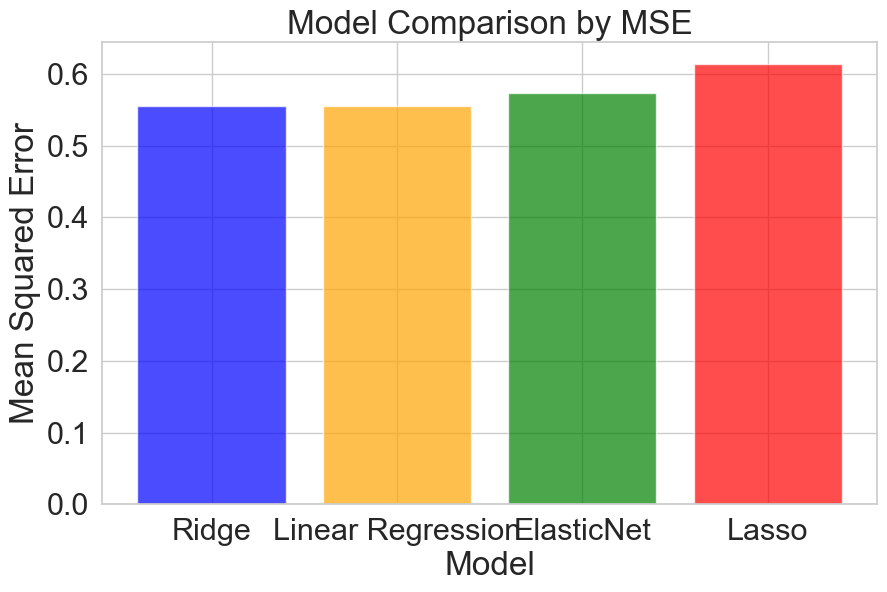

In [ ]:
### Cell 8: Compare models
# Creating a comparison DataFrame
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet'],
    'MSE': [mse, mse_lasso, mse_ridge, mse_elastic],
    'R2': [r2, r2_lasso, r2_ridge, r2_elastic]
})

# Sorting by MSE
comparison = comparison.sort_values(by='MSE').reset_index(drop=True)

# Displaying the comparison table
print("\nModel Comparison:")
print(comparison)

# Visualizing the comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison['Model'], comparison['MSE'], color=['blue', 'orange', 'green', 'red'], alpha=0.7)
plt.title("Model Comparison by MSE")
plt.ylabel("Mean Squared Error")
plt.xlabel("Model")
plt.show()

The comparison table shows the performance of four regression models based on two metrics: Mean Squared Error (MSE) and R-squared (R²).

1. **Ridge Regression**:
   - **MSE**: 0.5558 (lowest, indicating the best fit among the models in terms of error minimization).
   - **R²**: 0.5759 (slightly better than Linear Regression).

   Ridge regression performs the best overall, balancing regularization and accuracy.

2. **Linear Regression**:
   - **MSE**: 0.5559 (very close to Ridge, but slightly higher).
   - **R²**: 0.5758.

   While simple Linear Regression is close to Ridge, it lacks regularization, which could make it less robust in other scenarios.

3. **ElasticNet Regression**:
   - **MSE**: 0.5731.
   - **R²**: 0.5627.

   ElasticNet combines both Lasso and Ridge regularization. Its slightly higher MSE suggests it is not as effective for this dataset, likely because the dataset does not require as much sparsity or feature selection.

4. **Lasso Regression**:
   - **MSE**: 0.6135 (highest among the models, indicating the largest error).
   - **R²**: 0.5318.

   Lasso performs the worst, possibly due to its tendency to zero out coefficients, which may have eliminated useful features.

### Key Takeaways:
- **Ridge Regression** outperforms the other models slightly, demonstrating that regularization improves performance by controlling overfitting.
- **Linear Regression** is nearly equivalent but might not generalize as well without regularization.
- **ElasticNet** offers moderate performance, potentially useful when sparsity and feature selection are priorities.
- **Lasso Regression** struggles here, suggesting that penalizing coefficients too strongly is suboptimal for this dataset.